1 Import Libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt
import seaborn as sns

2 Gather Dataset

In [2]:
boston = load_boston()
df = pd.DataFrame(boston.data,columns=boston.feature_names)

In [3]:
df['Price']=boston.target

3 Perform EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

4 Feature Selection

4.1 Linearity

<AxesSubplot:>

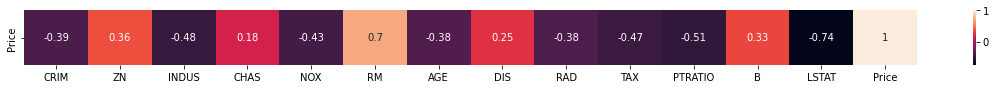

In [7]:
corr =df.corr().tail(1)
plt.figure(figsize=(20,1))
sns.heatmap(corr,annot=True)

In [8]:
x=df.drop('Price',axis =1)
y= df['Price']

4.2 No Multicolinearity

<AxesSubplot:>

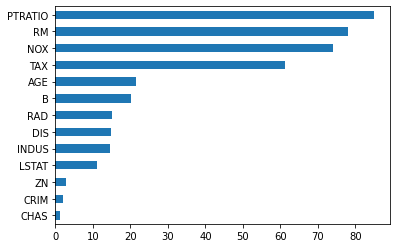

In [9]:
vif_list = []

for i in range(x.shape[1]):
    vif = variance_inflation_factor(x.to_numpy(),i)
    vif_list.append(vif)
    
s1 = pd.Series(vif_list,index = x.columns)
s1.sort_values().plot(kind ='barh')

4.3 Skewness 

In [10]:
x.skew()

CRIM       5.223149
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
dtype: float64

5 Train Model

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)
lin_model = LinearRegression()
lin_model.fit(x_train,y_train)

LinearRegression()

In [12]:
y_pred = lin_model.predict(x_test)

6 Evauluation on Test Data

In [13]:
mse = mean_squared_error(y_test,y_pred)
print(mse)
rmse = np.sqrt(mse)
print(rmse)
mae = mean_absolute_error(y_test,y_pred)
print(mae)
r2 = r2_score(y_test,y_pred)
print(r2)

23.38083648027037
4.835373458200553
3.7507121808389177
0.7634174432138457


7 Evaluation on Training Data

In [14]:
y_pred_train = lin_model.predict(x_train)

In [15]:
mse = mean_squared_error(y_train,y_pred_train)
print(mse)
rmse = np.sqrt(mse)
print(rmse)
mae = mean_absolute_error(y_train,y_pred_train)
print(mae)
r2 = r2_score(y_train,y_pred_train)
print(r2)

21.86279471487961
4.675766751547773
3.196196807325742
0.7293585058196337


# Ridge and Lasso Regression

In [16]:
ridge_model = Ridge()
ridge_model.fit(x_train,y_train)

Ridge()

In [17]:
y_pre = ridge_model.predict(x_test)

Evaluation on Test Data

In [18]:
mse = mean_squared_error(y_test,y_pre)
print(mse)
rmse = np.sqrt(mse)
print(rmse)
mae = mean_absolute_error(y_test,y_pre)
print(mae)
r2 = r2_score(y_test,y_pre)
print(r2)

23.167110599407724
4.813222475577845
3.712550113426303
0.7655800611077147


Evaluation On Training Data

In [19]:
y_pre_train = ridge_model.predict(x_train)

In [20]:
mse = mean_squared_error(y_train,y_pre_train)
print(mse)
rmse = np.sqrt(mse)
print(rmse)
mae = mean_absolute_error(y_train,y_pre_train)
print(mae)
r2 = r2_score(y_train,y_pre_train)
print(r2)

22.09845525613
4.700899409275846
3.1838728685438014
0.7264412428697167


Lasso Regression

In [21]:
lasso_model = Lasso()
lasso_model.fit(x_train,y_train)


Lasso()

In [22]:
y_lasso = lasso_model.predict(x_test)

Evaluation on Testing

In [23]:
mse = mean_squared_error(y_test,y_lasso)
print(mse)
rmse = np.sqrt(mse)
print(rmse)
mae = mean_absolute_error(y_test,y_lasso)
print(mae)
r2 = r2_score(y_test,y_lasso)
print(r2)

35.57857812473966
5.964778128710209
4.321684548295284
0.6399927356461494


Evaluation on Training

In [24]:
y_Lass_t = lasso_model.predict(x_train)

In [25]:
mse = mean_squared_error(y_train,y_Lass_t)
print(mse)
rmse = np.sqrt(mse)
print(rmse)
mae = mean_absolute_error(y_train,y_Lass_t)
print(mae)
r2 = r2_score(y_train,y_Lass_t)
print(r2)

27.011893884305515
5.197296786244318
3.5911350863810654
0.6656173459601455


# Grid Seach CV

In [26]:
params_grid = {'alpha':np.arange(0.01,3,0.01)}
gscv_ridge_model = GridSearchCV(ridge_model,params_grid,cv =5)
gscv_ridge_model.fit(x_train,y_train)
gscv_ridge_model.best_estimator_

Ridge(alpha=0.04)

In [27]:
ridge_model = Ridge(alpha=0.04)
ridge_model.fit(x_train,y_train)
y_pre = ridge_model.predict(x_test)

In [28]:
mse = mean_squared_error(y_test,y_pre)
print(mse)
rmse = np.sqrt(mse)
print(rmse)
mae = mean_absolute_error(y_test,y_pre)
print(mae)
r2 = r2_score(y_test,y_pre)
print(r2)

23.34814824215601
4.8319921608127645
3.7464156413980536
0.7637482041323636


In [29]:
y_pre_train = ridge_model.predict(x_train)

In [30]:
mse = mean_squared_error(y_train,y_pre_train)
print(mse)
rmse = np.sqrt(mse)
print(rmse)
mae = mean_absolute_error(y_train,y_pre_train)
print(mae)
r2 = r2_score(y_train,y_pre_train)
print(r2)

21.863949486586755
4.675890234659787
3.1925924644726416
0.7293442107972298


Lasso GridSearchCv

In [31]:
params_grid = {'alpha':np.arange(0.01,3,0.01)}
gscv_lasso_model = GridSearchCV(lasso_model,params_grid,cv =5)
gscv_lasso_model.fit(x_train,y_train)
gscv_lasso_model.best_estimator_

Lasso(alpha=0.01)

In [32]:
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(x_train,y_train)


Lasso(alpha=0.01)

In [33]:
y_lasso = lasso_model.predict(x_test)

In [34]:
mse = mean_squared_error(y_test,y_lasso)
print(mse)
rmse = np.sqrt(mse)
print(rmse)
mae = mean_absolute_error(y_test,y_lasso)
print(mae)
r2 = r2_score(y_test,y_lasso)
print(r2)

23.33235896316197
4.830358057448947
3.735164584697135
0.763907970357895


In [35]:
y_Lass_t = lasso_model.predict(x_train)

In [36]:
mse = mean_squared_error(y_train,y_Lass_t)
print(mse)
rmse = np.sqrt(mse)
print(rmse)
mae = mean_absolute_error(y_train,y_Lass_t)
print(mae)
r2 = r2_score(y_train,y_Lass_t)
print(r2)

21.899494548206345
4.679689578188531
3.179492758135989
0.7289041952954187
